<a href="https://colab.research.google.com/github/shaikadish/imdbProject/blob/main/EDA_and_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lets take a look...

First thing is first. We need to see what exactly we have scraped from IMDB. This examination will take the form of Exploratory Data Analysis (EDA). Based on what we learn about the data, we should get a better idea about the kind of performance our final model will give us. Lets take a look!

# Imports and setup

In [ ]:
# Mount to google drive
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/GitHub/IMDB_project/imdbProject

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Load in our scraped review data
review_data=pd.read_csv('review_data.csv')
review_data.head(5)

,review_title,review_rating,review_date,review_body,movie_title
0,A loving and charming depiction of losing a mo...,8,17 May 2013,As a film lover I can't help immensely enjoyin...,Mamma Gógó
1,"so true,",8,4 September 2014,This movie is so true showing the heartbreakin...,Mamma Gógó
2,Warning signs of a bad movie,1,11 March 2015,I just had a good laugh at sddavis63's review ...,Second Chances
3,A Weak Cast Offering Weak Performances In A Dr...,1,29 January 2010,"By the time ""Second Chances"" is finished, all ...",Second Chances
4,Moderately entertaining,6,3 January 2017,A reporter who made an error of judgement find...,Second Chances


# Review trend analysis

We will start with some analysis for interests sake. First, lets see how review trends have changed in the last 12 years:



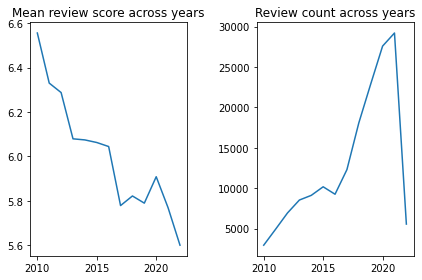

In [28]:
# First, make a list of the year in which each review was written
year_list=[]
for date in review_data['review_date']:
  year_list.append(date.split(' ')[-1])

# Next, make a list of DataFrames, with each element in the list representing all reviews for a specific year
years=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']
year_dfs=[]
for year in years:
  year_dfs.append(review_data[pd.Series(year_list)==year])

# Get review counts and average reviews for each year
review_count=[]
review_mean=[]
for year in year_dfs:
  review_count.append(year.shape[0])
  review_mean.append(year['review_rating'].to_numpy().mean())

# Plot results
x=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, review_mean)
ax1.set_title('Mean review score across years')
ax2.plot(x, review_count)
ax2.set_title('Review count across years')

f.tight_layout()

This is a very intersting result! Firstly, it is clear that reviews have increasingly become more cynical across the years. This could be a result of a maturing of the online review format: As people become more used to watching, reading, and writing online film reviews, they might also be becoming more critical.

The second figure also reveals something interesting: in 2017, people started writing way more IMDB reviews. If you look at the [top grossing movies of that year](https://www.boxofficemojo.com/year/2017/), it may reveal why. There are five super hero movies in the top ten highest grosing films of that year! These are films with passionate fan bases, who are likely to engage with the critical discourse online. Additionally, two *Star Wars* films came out that year, with one of them being *The Last Jedi*, a highly controvercial film in the *Star Wars* cannon, which produced a tsunami of online discourse. The discussion produced by these films might have introduced new people to IMDB and its review format, creating a boom which is still continuing today.

If you are wondering about the dip at the end, that is for 2022, which at the time of writing is only in the month of May.

# Rating analysis

The first data we will look at are the review ratings. Even although our model is going to be trained for regression, due the contiguous nature of review scores, it is useful to analyze the ratings as if they are discrete classes, as this will reveal potential biases the network might inherit from the data.

Let's look at the distribution and size of our dataset:

Number of reviews: 167634
Mean: 5.9
Median: 7.0


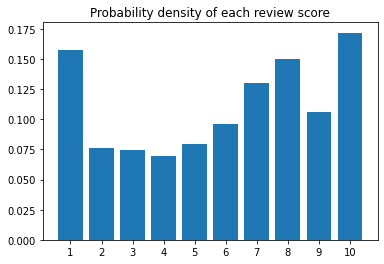

In [33]:
# Get review ratings
ratings=review_data['review_rating'].to_numpy()

print(f"Number of reviews: {len(ratings)}")
print(f'Mean: {round(ratings.mean(),1)}')
print(f'Median: {round(np.median(ratings),1)}')

x=[1,2,3,4,5,6,7,8,9,10]
plt.title("Probability density of each review score")
plt.bar(x, np.histogram(ratings,density=True)[0], align='center')
plt.xticks(x)
plt.show()

In [ ]:
review_count
review_mean

[6.556345177664975,
 6.330494728304947,
 6.2878547759688805,
 6.079274004683841,
 6.074350257703696,
 6.062678062678063,
 6.0445020522791095,
 5.77830150345388,
 5.821600398164022,
 5.7893035043257886,
 5.908352668213457,
 5.768303540853366,
 5.599712540424003]

# Text analysis

In [ ]:
review_data.head(20)

,review_title,review_rating,review_date,review_body,movie_title
0,A loving and charming depiction of losing a mo...,8,17 May 2013,As a film lover I can't help immensely enjoyin...,Mamma Gógó
1,"so true,",8,4 September 2014,This movie is so true showing the heartbreakin...,Mamma Gógó
2,Warning signs of a bad movie,1,11 March 2015,I just had a good laugh at sddavis63's review ...,Second Chances
3,A Weak Cast Offering Weak Performances In A Dr...,1,29 January 2010,"By the time ""Second Chances"" is finished, all ...",Second Chances
4,Moderately entertaining,6,3 January 2017,A reporter who made an error of judgement find...,Second Chances
5,Soap Opera or Thriller?,4,11 January 2017,"I'm not too sure what the writers, Angelique P...",Second Chances
6,some problems in TV movie,5,25 April 2019,Boston serial killer Max Hersog has been in pr...,Second Chances
7,"Boring, predictable and acting was not great",3,11 November 2020,I had an interest in seeing this movie due to ...,Second Chances
8,Melissa George and everything else.,3,29 September 2021,The movie is straight trash but Melissa George...,Second Chances
9,"""Be Aware and Keep Your Eyes Open!""",1,5 September 2017,It is easy to tell when the protagonist in a c...,Second Chances


In [ ]:
# Get rid of helpfullness comment
for i,review_body in enumerate(review_data['review_body']):
  if review_body.find('\n                \n                    ')!=-1:
    review_data['review_body'].iloc[i]=review_body[:review_body.find('\n                \n                    ')]

review_data.to_csv('review_data_clean.csv',index=False)

In [ ]:
review_data=pd.read_csv('review_data_clean.csv')

In [ ]:
training_data=pd.DataFrame(zip(review_data.review_body,review_data.review_rating))
training_data.to_csv('review_data_learning.csv',index=False)

In [ ]:
# USES TOO MUCH RAM. DO THIS JUST FOR 2021?
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# make corpus
body_list= review_data['review_body'].tolist()
corpus=' '.join(body_list)

# Generate a word cloud image
wordcloud = WordCloud().generate(corpus)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Talk about the fact that the information content is not always there to decipher the score, or there could be massive inconsistensies between the types of reviews left for specific ratings. Cherry pick examples to show this.